<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/90%20%D1%82%D1%80%D0%B5%D0%BD%20%D0%B8%D1%80%D1%83%D0%B5%D0%BC_of_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание изображений из набора данных CIFAR-10 с помощью свёрточный нейронных сетей



#Подготовка данных
Подключение библиотек

In [0]:
from keras.datasets import cifar10 #Загружаем базу cifar10
from keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточный сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений

Загрузка данных

In [0]:
#Загружаем все базы
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

#задаём заранее batch_size для сетей
batch_size = 128
#Загружаем названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

#Превращаем выходы сетей в формат  one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_train100 = utils.to_categorical(y_train100, 100)


Отображение картинки на выбор

лошадь


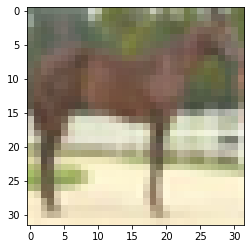

In [20]:
#Выводим для примера картинку
n = 2553
#Загружаем картинку из массива и отрисовываем в цветном формате - RGBA
print(classes[np.argmax(y_train10[n])])
plt.imshow(Image.fromarray(x_train10[n]).convert('RGBA'))
plt.show()

In [13]:
#Выводим пример картинки в цифрах, как она хранится в памяти
print(x_train10[n, 0, 0])

[255 255 255]


In [14]:
print(x_train10.shape)
print(x_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#Нейронные сети
**1** Создаём мощьную свёрточную сетку из 4-х блоков по 3 промежуточных слоя. Базовая архитектура свёрточной сети для работы с набором CIFAR 10

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 - 128s - loss: 1.7720 - acc: 0.3343 - val_loss: 1.9542 - val_acc: 0.3877
Epoch 2/20
40000/40000 - 128s - loss: 1.3027 - acc: 0.5258 - val_loss: 2.1566 - val_acc: 0.4242
Epoch 3/20
40000/40000 - 127s - loss: 1.0787 - acc: 0.6176 - val_loss: 0.9604 - val_acc: 0.6613
Epoch 4/20
40000/40000 - 127s - loss: 0.9161 - acc: 0.6783 - val_loss: 0.9563 - val_acc: 0.6742
Epoch 5/20
40000/40000 - 127s - loss: 0.7986 - acc: 0.7239 - val_loss: 0.8808 - val_acc: 0.6990
Epoch 6/20
40000/40000 - 126s - loss: 0.7097 - acc: 0.7576 - val_loss: 0.7294 - val_acc: 0.7484
Epoch 7/20
40000/40000 - 126s - loss: 0.6286 - acc: 0.7887 - val_loss: 0.6645 - val_acc: 0.7741
Epoch 8/20
40000/40000 - 126s - loss: 0.5586 - acc: 0.8116 - val_loss: 0.6405 - val_acc: 0.7887
Epoch 9/20
40000/40000 - 125s - loss: 0.5084 - acc: 0.8291 - val_loss: 0.5805 - val_acc: 0.8091
Epoch 10/20
40000/40000 - 126s - loss: 0.4554 - acc: 0.8464 - val_loss: 0.5963 - val_a

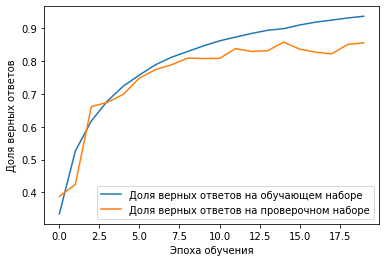

In [0]:
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Третий сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Девятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Двенацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**результат** Epoch 15/20
40000/40000 - 125s - loss: 0.3028 - acc: 0.8989 - val_loss: 0.4618 - val_acc: 0.8579

**2** Увеличение слоев и колличества нейронов , дало хорошие результаты добавим слои подвыборки model.add(MaxPooling2D(pool_size=(2, 2)))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 - 47s - loss: 1.9507 - acc: 0.1969 - val_loss: 1.8479 - val_acc: 0.2339
Epoch 2/30
40000/40000 - 37s - loss: 1.7960 - acc: 0.2672 - val_loss: 1.7699 - val_acc: 0.3218
Epoch 3/30
40000/40000 - 38s - loss: 1.5546 - acc: 0.3726 - val_loss: 1.4529 - val_acc: 0.4329
Epoch 4/30
40000/40000 - 39s - loss: 1.3525 - acc: 0.4909 - val_loss: 1.2644 - val_acc: 0.5383
Epoch 5/30
40000/40000 - 39s - loss: 1.1814 - acc: 0.5785 - val_loss: 1.1784 - val_acc: 0.5722
Epoch 6/30
40000/40000 - 39s - loss: 1.0383 - acc: 0.6417 - val_loss: 1.1466 - val_acc: 0.6059
Epoch 7/30
40000/40000 - 39s - loss: 0.9177 - acc: 0.6889 - val_loss: 0.9663 - val_acc: 0.6789
Epoch 8/30
40000/40000 - 39s - loss: 0.8156 - acc: 0.7269 - val_loss: 0.8420 - val_acc: 0.7218
Epoch 9/30
40000/40000 - 39s - loss: 0.7238 - acc: 0.7646 - val_loss: 0.8040 - val_acc: 0.7373
Epoch 10/30
40000/40000 - 39s - loss: 0.6464 - acc: 0.7897 - val_loss: 0.7791 - val_acc: 0.7473

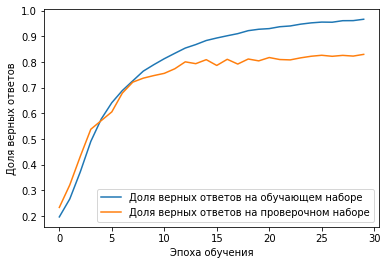

In [10]:
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Второй сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Третий сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Девятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Пятый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Двенацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Шестой слой подвыборки
model.add(MaxPooling2D(pool_size=(1, 1)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Вывод** Результат ухудшился




**3** Изменим размер ядер, ставим ядро свертки 2,2

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 173s - loss: 1.8290 - acc: 0.3025 - val_loss: 1.7131 - val_acc: 0.3748
Epoch 2/40
40000/40000 - 173s - loss: 1.3975 - acc: 0.4787 - val_loss: 1.4169 - val_acc: 0.4934
Epoch 3/40
40000/40000 - 174s - loss: 1.1810 - acc: 0.5716 - val_loss: 1.1872 - val_acc: 0.5689
Epoch 4/40
40000/40000 - 173s - loss: 1.0566 - acc: 0.6235 - val_loss: 1.0916 - val_acc: 0.6139
Epoch 5/40
40000/40000 - 173s - loss: 0.9583 - acc: 0.6622 - val_loss: 0.9942 - val_acc: 0.6499
Epoch 6/40
40000/40000 - 173s - loss: 0.8828 - acc: 0.6866 - val_loss: 0.8521 - val_acc: 0.6918
Epoch 7/40
40000/40000 - 173s - loss: 0.8185 - acc: 0.7103 - val_loss: 0.7727 - val_acc: 0.7293
Epoch 8/40
40000/40000 - 172s - loss: 0.7717 - acc: 0.7293 - val_loss: 0.7700 - val_acc: 0.7273
Epoch 9/40
40000/40000 - 172s - loss: 0.7320 - acc: 0.7459 - val_loss: 0.7100 - val_acc: 0.7512
Epoch 10/40
40000/40000 - 172s - loss: 0.6844 - acc: 0.7661 - val_loss: 0.7122 - val_a

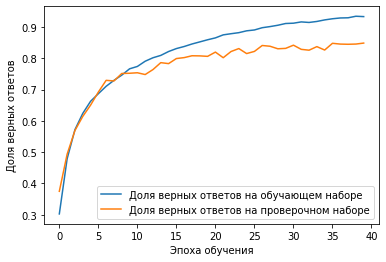

In [12]:

model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 512, (2, 2), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 512, (2, 2), padding='same', activation='relu'))
#Третий сверточный слой
model.add(Conv2D( 512, (2, 2), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
#Девятый сверточный слой
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
#Двенацатый сверточный слой
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Вывод** получили результат немного хуже первоночального, на 0,7 прощента, возвращаем ядро 3, 3 .

**4** увеличиваем колличество нейронов в каждом блоке на величину аналогичную предыдущему блоку, делаем это постепенно. Проверяем гипотезу о влиянии колличества нейронов на результат.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 104s - loss: 1.7838 - acc: 0.3345 - val_loss: 1.8728 - val_acc: 0.3338
Epoch 2/40
40000/40000 - 92s - loss: 1.3340 - acc: 0.5149 - val_loss: 1.3964 - val_acc: 0.5168
Epoch 3/40
40000/40000 - 92s - loss: 1.1030 - acc: 0.6054 - val_loss: 1.1663 - val_acc: 0.5999
Epoch 4/40
40000/40000 - 92s - loss: 0.9500 - acc: 0.6629 - val_loss: 0.9160 - val_acc: 0.6783
Epoch 5/40
40000/40000 - 92s - loss: 0.8380 - acc: 0.7104 - val_loss: 0.8178 - val_acc: 0.7168
Epoch 6/40
40000/40000 - 92s - loss: 0.7523 - acc: 0.7411 - val_loss: 0.7398 - val_acc: 0.7494
Epoch 7/40
40000/40000 - 92s - loss: 0.6615 - acc: 0.7756 - val_loss: 0.6611 - val_acc: 0.7796
Epoch 8/40
40000/40000 - 92s - loss: 0.6065 - acc: 0.7934 - val_loss: 0.7034 - val_acc: 0.7610
Epoch 9/40
40000/40000 - 92s - loss: 0.5528 - acc: 0.8121 - val_loss: 0.5854 - val_acc: 0.8016
Epoch 10/40
4

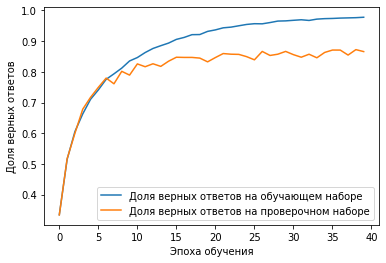

In [7]:

model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Третий сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Девятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Двенацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Вывод** Результат улучшен на 2 процента, направление правильное, увеличим нейроны в следующих слоях в каждом блоке.

`Epoch 36/4040000/40000 - 92s - loss: 0.0855 - acc: 0.9739 - val_loss: 0.5595 - val_acc: 0.8709
```



**4** увеличиваем колличество неронов в последующих слоях каждого блока.

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 161s - loss: 1.8480 - acc: 0.3079 - val_loss: 2.0540 - val_acc: 0.3664
Epoch 2/40
40000/40000 - 156s - loss: 1.4378 - acc: 0.4739 - val_loss: 1.3473 - val_acc: 0.5219
Epoch 3/40
40000/40000 - 156s - loss: 1.1961 - acc: 0.5699 - val_loss: 1.2161 - val_acc: 0.5747
Epoch 4/40
40000/40000 - 156s - loss: 1.0272 - acc: 0.6323 - val_loss: 0.9687 - val_acc: 0.6633
Epoch 5/40
40000/40000 - 156s - loss: 0.8994 - acc: 0.6855 - val_loss: 0.9166 - val_acc: 0.6857
Epoch 6/40
40000/40000 - 156s - loss: 0.8015 - acc: 0.7226 - val_loss: 0.8779 - val_acc: 0.6984
Epoch 7/40
40000/40000 - 156s - loss: 0.7113 - acc: 0.7570 - val_loss: 0.8922 - val_acc: 0.7056
Epoch 8/40
40000/40000 - 156s - loss: 0.6366 - acc: 0.7843 - val_loss: 0.6539 - val_acc: 0.7760
Epoch 9/40
40000/40000 - 156s - loss: 0.5734 - acc: 0.8048 - val_loss: 0.7742 - val_acc: 0.7577
Epoch 10/40
40000/40000 - 156s - loss: 0.5174 - acc: 0.8254 - val_loss: 0.6305 - val_a

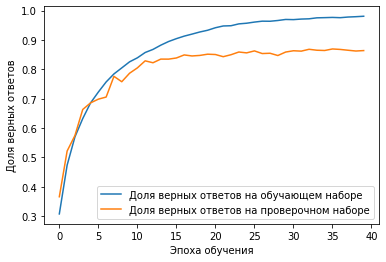

In [10]:

model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Третий сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Девятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Двенацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Вывод**. Увеличение нейронов во вторых слоях каждого блока не влияет на результат обучения сети

```
Epoch 36/40
40000/40000 - 156s - loss: 0.0744 - acc: 0.9765 - val_loss: 0.6412 - val_acc: 0.8692
```



**5** **Запускаем** две сетки одна с увеличерием dropout 0,45, другая с уменьшением 0,25

 **Вывод**: увеличение не меняет результат получен 0.8671 при dropout 0,45; уменьшение dropout 0,25 тоже не меняет результат в лучшую сторну 0.8664

**6** **Меняем количество слоев**                                                     




**6.1** добавим в каждый блок еще по одному сверточному слою.


**результат ** уменьшился val_acc: 0.8272

**6.2**. каждый блок уменьшаем на один сверточный слой

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 67s - loss: 1.6787 - acc: 0.3734 - val_loss: 1.3054 - val_acc: 0.5144
Epoch 2/40
40000/40000 - 66s - loss: 1.2049 - acc: 0.5688 - val_loss: 1.1370 - val_acc: 0.5989
Epoch 3/40
40000/40000 - 66s - loss: 0.9637 - acc: 0.6615 - val_loss: 0.8799 - val_acc: 0.6879
Epoch 4/40
40000/40000 - 66s - loss: 0.8265 - acc: 0.7142 - val_loss: 0.8953 - val_acc: 0.6919
Epoch 5/40
40000/40000 - 66s - loss: 0.7191 - acc: 0.7548 - val_loss: 0.8181 - val_acc: 0.7255
Epoch 6/40
40000/40000 - 66s - loss: 0.6438 - acc: 0.7817 - val_loss: 0.7030 - val_acc: 0.7662
Epoch 7/40
40000/40000 - 66s - loss: 0.5783 - acc: 0.8020 - val_loss: 0.6121 - val_acc: 0.7944
Epoch 8/40
40000/40000 - 66s - loss: 0.5170 - acc: 0.8256 - val_loss: 0.6081 - val_acc: 0.7943
Epoch 9/40
40000/40000 - 66s - loss: 0.4863 - acc: 0.8354 - val_loss: 0.5399 - val_acc: 0.8179
Epoch 10/40
40000/40000 - 66s - loss: 0.4317 - acc: 0.8555 - val_loss: 0.5397 - val_acc: 0.8280

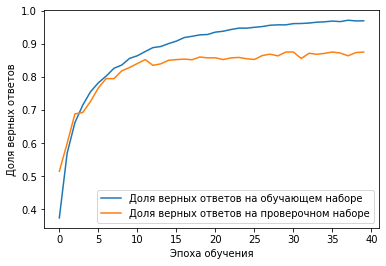

In [14]:

model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**вывод**   Уменьшение сверточного слоя на один в каждом блоке улучшило результат val_acc: 0.8747

**7** **Вариант** увеличения колличества блоков, Нейронная сеть с 5 блоками, пятый блок с 32 нейронами в слое на выходе из нейро сети.

**Вывод**   - результат обучения немного понизился val_acc: 0.8697


**8** Нейронная сеть с 5 блоками , блок добавляем в начале сетки первый слой 2048 нейронов

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 228s - loss: 1.7610 - acc: 0.3330 - val_loss: 1.6125 - val_acc: 0.4243
Epoch 2/40
40000/40000 - 215s - loss: 1.2711 - acc: 0.5430 - val_loss: 1.1616 - val_acc: 0.5951
Epoch 3/40
40000/40000 - 216s - loss: 0.9963 - acc: 0.6547 - val_loss: 0.8527 - val_acc: 0.7022
Epoch 4/40
40000/40000 - 215s - loss: 0.8442 - acc: 0.7151 - val_loss: 0.7736 - val_acc: 0.7373
Epoch 5/40
40000/40000 - 215s - loss: 0.7224 - acc: 0.7636 - val_loss: 0.7827 - val_acc: 0.7386
Epoch 6/40
40000/40000 - 215s - loss: 0.6260 - acc: 0.7926 - val_loss: 0.6629 - val_acc: 0.7816
Epoch 7/40
40000/40000 - 215s - loss: 0.5543 - acc: 0.8205 - val_loss: 0.5902 - val_acc: 0.8055
Epoch 8/40
40000/40000 - 215s - loss: 0.4940 - acc: 0.8394 - val_loss: 0.5474 - val_acc: 0.8210
Epoch 9/40
40000/40000 - 215s - loss: 0.4369 - acc: 0.8580 - val_loss: 0.5298 - val_acc: 0.8244
Epoch 10/40
40000/40000 - 215s - loss: 0.3914 - acc: 0.8753 - val_loss: 0.4967 - val_a

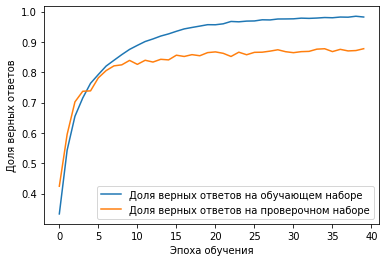

In [20]:
model = Sequential()

#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 2048, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Добавочный сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
#второй добавочный сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#добавочный слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**вывод**   Увеличение на один  блок в начале сетки улучшило результат на 0,003 - val_acc: 0.8776

**8** Попробуем упростить сетку убрав по одному сверточному слою из 2,3,4.5 блоков
, гипотеза в том что дополнителбные слои не влияют на качество обучения.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 208s - loss: 1.7282 - acc: 0.3477 - val_loss: 1.4395 - val_acc: 0.4676
Epoch 2/40
40000/40000 - 191s - loss: 1.2447 - acc: 0.5448 - val_loss: 1.1221 - val_acc: 0.5864
Epoch 3/40
40000/40000 - 191s - loss: 1.0154 - acc: 0.6384 - val_loss: 0.9786 - val_acc: 0.6599
Epoch 4/40
40000/40000 - 191s - loss: 0.8657 - acc: 0.6966 - val_loss: 0.7503 - val_acc: 0.7418
Epoch 5/40
40000/40000 - 191s - loss: 0.7528 - acc: 0.7425 - val_loss: 0.8214 - val_acc: 0.7177
Epoch 6/40
40000/40000 - 191s - loss: 0.6715 - acc: 0.7692 - val_loss: 0.6300 - val_acc: 0.7886
Epoch 7/40
40000/40000 - 191s - loss: 0.5943 - acc: 0.7986 - val_loss: 0.5578 - val_acc: 0.8160
Epoch 8/40
40000/40000 - 191s - loss: 0.5553 - acc: 0.8139 - val_loss: 0.6417 - val_acc: 0.7787
Epoch 9/40
40000/40000 - 191s - loss: 0.5008 - acc: 0.8321 - val_loss: 0.5767 - val_acc: 0.8081
Epoch

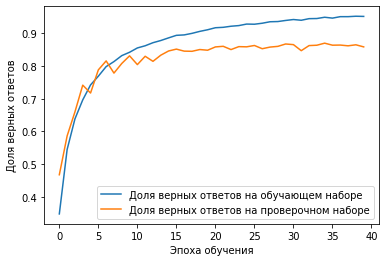

In [8]:
model = Sequential()

#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 2048, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
# третий сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#добавочный слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Вывод**  Результат снизился на 0,007 возвращаем второй слой в каждый блок.

**9** Добавляем еще один блок шестой на входе с увеличением колличества нейронов в первом слое в два раза.

In [21]:
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 4096, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 2048, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Добавочный сверточный слой
model.add(Conv2D(2048, (3, 3), padding='same', activation='relu'))
#второй добавочный сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
#добавочный слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Добавочный сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
#второй добавочный сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#добавочный слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

ValueError: ignored

#Распознавание случайной картинки из тестового набора

In [0]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

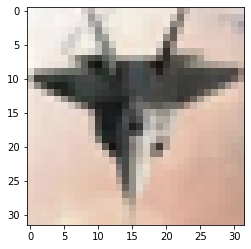

Выход сети:  [9.9999952e-01 3.3566351e-11 3.4130932e-07 5.8843208e-10 4.1419256e-08
 2.8018829e-12 6.2239601e-12 2.3296944e-11 7.3273689e-08 4.0805159e-10]
Распознанный образ:  0
Верный ответ:  [0]
Распознанный браз на картинке:  самолет


In [24]:
#Выбираем номер пример
n = 2678

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

#Распознаем дополнительные картинки

In [0]:
#Загружаем свою картинку
files.upload()
#Проверяем, что картинка загрузилась
!ls

Saving friends.jpg to friends.jpg
airplane_12.jpg  airplane_1.jpg  friends.jpg  sample_data


In [0]:
#Вводим адрес картинки
img_path = 'friends.jpg'
#Загружаем картинку в массив
img = image.load_img(img_path, target_size=(32, 32))
#Отрисовываем картинку
plt.imshow(img)
plt.show()

In [0]:
#переводим картинку в массив
x = image.img_to_array(img)
#Добавляем одну размерность для предсказания
x = np.expand_dims(x, axis=0)
#Распознаём класс картинки
prediction = model.predict(x)
prediction = np.argmax(prediction)
#Вводим результаты на экран
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])